# Normal Distribution

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

The normal distribution, also known as the Gaussian distribution, is a continuous, symmetrical probability distribution that visually resembles, and is popularly known as, the bell curve.

A quick plot in NumPy will display the typical shape:

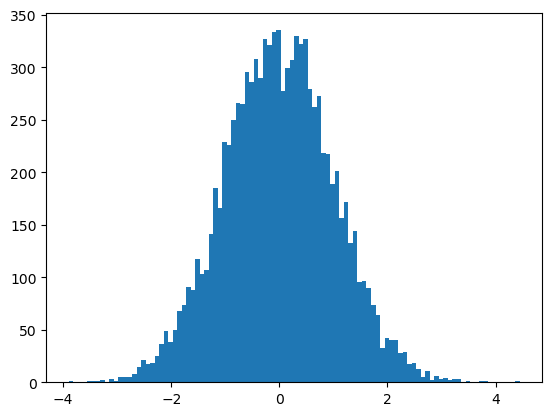

In [2]:
nor = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(nor, bins=100)
plt.show()

The exact characteristics of this curve are determined by two parameters:

1. he mean of the range under investigation (signified by the Greek 
sigma ,or mu, symbol). In NumPy this is known as the loc parameter;
2. the standard variation of the same dataset (signified by the Greek sigma
, or sigma, symbol). In NumPy, this is know nas the scale parameter.

# Building a normal distribution plot in NumPy
Now we know a bit more about these parameters, below is a more detailed visual representation of this, where we can see how each curve peaks at the 
 value, and gets flatter given a larger 
 value. The plot contains four different lines representing normally-distributed data, with differing values for the mean (
) and the standard variation (
).

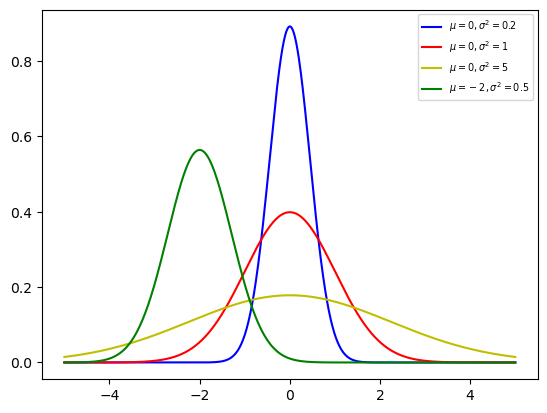

In [3]:
x = np.linspace(-5.0, 5.0, 1000)
mu_sig = [[0,0.2, 'b'], [0,1, 'r'], [0,5, 'y'], [-2,0.5,'g']]
for i in mu_sig:
    mu = i[0]
    sig = i[1]
    sigma = np.sqrt(sig)
    colour = i[2]
   
    plt.plot(
        x,
        1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2)), 
        color=colour, 
        label=f'$\mu = {mu},\sigma^2 = {sig}$')

plt.legend(loc='best', fontsize='x-small')
plt.show()


We can see the effect that changing either or both of the 
 and 
 values has on the shape of the plot. So the normal distribution assigns values equally either side of the mean, so the curve itself always remains symmetrical, and consistently peaks at the mean. This ensures that the "mean, median, and mode are all equal. Half of the population is less than the mean and half is greater than the mean." 

While the symmetry of the normal distribution is one of it's most striking features,  notes that, "not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric."

Indeed, we can create plots using all of these distribution methods just as easily as we created the normal distribution data, using just a couple of parameters, and observe how similar they are without closer inspection.

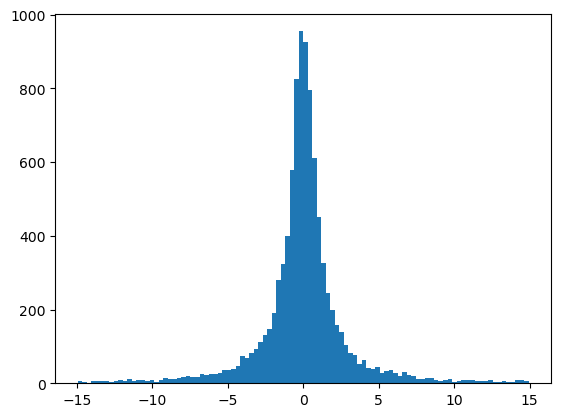

In [4]:
cau = np.random.standard_cauchy(size=10000)
cau = cau[(cau>-15) & (cau<15)]
plt.hist(cau, bins=100)
plt.show()

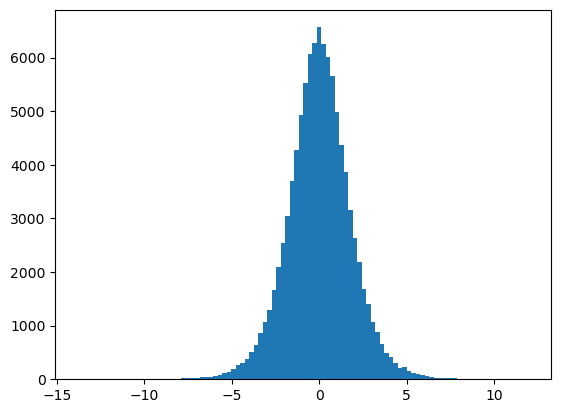

In [5]:
log = np.random.logistic(loc=0, scale=1, size=100000)

plt.hist(log, bins=100)
plt.show()

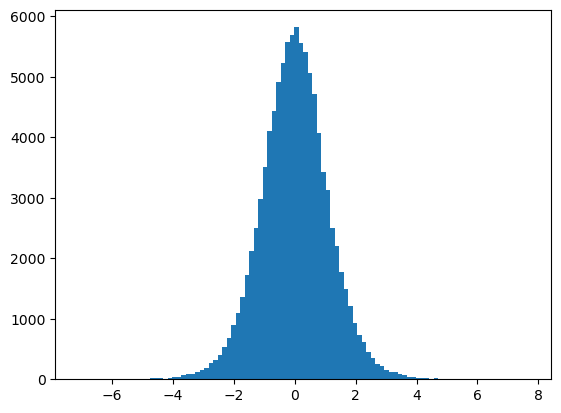

In [6]:
stt = np.random.standard_t(df=10, size=100000)
plt.hist(stt, bins=100)
plt.show()

# The normal density function
NumPy gives us the handy normal function that we've already seen, where we provide the parameters and get a nice plot back. But there is work going underneath that is important to understand too. All distributions are created by a corresponding probability density function



In [7]:
print(np.exp(1))
print(np.pi)

2.718281828459045
3.141592653589793


With the value of x
 being simply a given point on the x-axis, we have everything we need to calculate and plot a normal distribution. We can use NumPy's sqrt functions, as well as the pi and exp to help us construct the density function.

In [8]:
mu = 0.0 
sigma = 4.0 
x = 1.0 
(1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2))))

0.09666702920071231

This looks rather meaningless with just a single value, so we can plot multiple values to create an x-axis. We will use the linspace function to create an evenly-spaced number of intervals between two points.

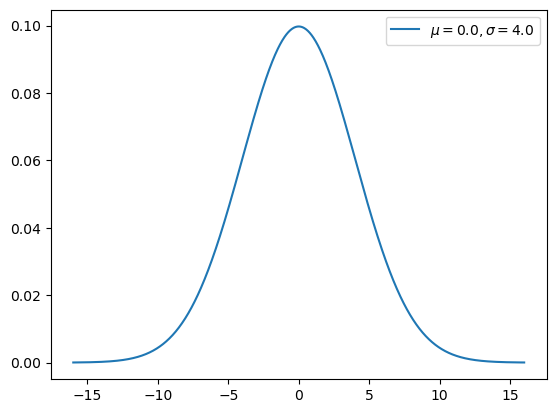

In [9]:
x = np.linspace(start=-16.0, stop=16.0, num=1000)
plt.plot(
    x,
    
    (1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2)))),
   
    label=f'$\mu = {mu}, \sigma = {sigma}$')

# Add a legend.
plt.legend()

# The Central Limit Theorem
Until now, we've been using large populations to demonstrate the normal distribution, but using a smaller dataset will help demonstrate a key feature of the normal distribution, and why it is so ubiquitous in the field of statistics and beyond.

I had previously picked 100,000 as a population size because it is sufficiently large for the curve to be relatively unaffected by anomalies. In all of the examples so far, the shape of the curve is broadly symmetrical, even if it is not exactly symmetrical. Below is the same code that was used at the very start of this notebook.

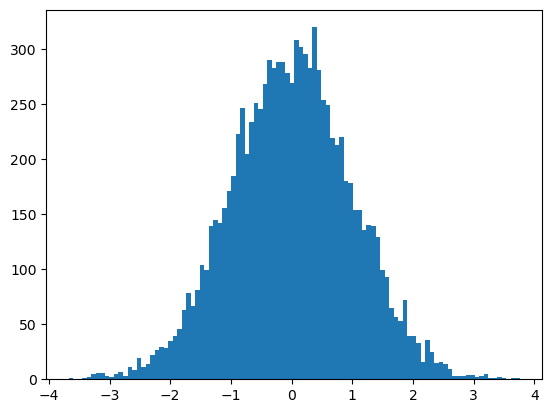

In [10]:
nor = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(nor, bins=100)
plt.show()

If we run the same code, but for a smaller number of data points, we can see that the anomalies of randomised data begin to appear more prominent, because in a smaller dataset, even a single outlier can have a much larger effect on a population. A population of 100, segmented into bins of 50 as displayed below, barely looks like a normal distribution at all, and we can see how powerful the outliers become.

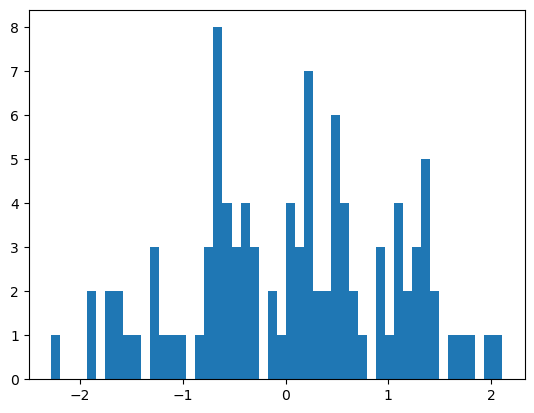

In [11]:
nor = np.random.normal(loc=0, scale=1, size=100)
plt.hist(nor, bins=50)
plt.show()

If we adjust the code for a population size of 1,000 in 100 bins, things start looking more familiar. We can still see that there's significant variations between individual bins that gives a 'spiky' look, but the familiar curve is visible.

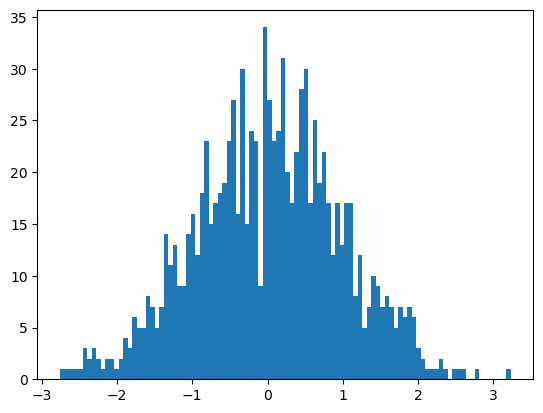

In [12]:
nor = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(nor, bins=100)
plt.show()

Once we get to a population size of 10,000, most of the 'spikes' previously observed have been smoothed out, and the outliers are now playing a much less significant role, those outliers are now falling outside of the 95% or two standard deviations that the Empirical Rule outlines earlier in the notebook.

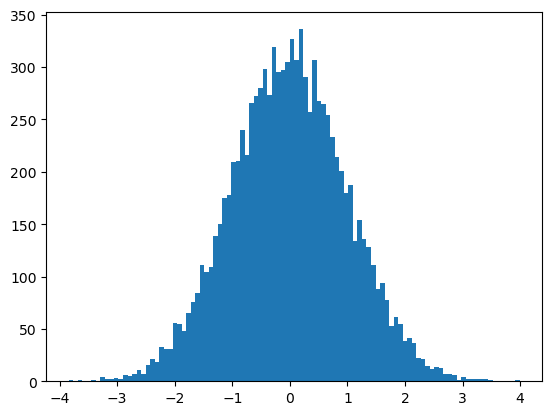

In [13]:
nor = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(nor, bins=100)
plt.show()

In isolation, this behaviour is to be expected. After all, we are asking the normal function to return data that is normally-distributed; proving that normally-distributed data is normally-distributed is a tautology. The real power of this comes in the sampling of data, and not necessarily even sampling normally-distributed data.

A core tenet of the central limit theorem (NIST ESH, 2003) holds that:

The sampling distribution of the mean becomes approximately normal regardless of the distribution of the original variable.

This makes the normal distribution extremely useful for testing the accuracy of sampled data, because rather than testing hundreds, thousands or even millions of sample datasets, you can plot their means together and expect those to be normally-distributed.

Following a YouTube video on the Central Limit Theorem (Starmer, 2018), we can demonstrate this quite quickly using the familiar tools.

In the example, Starmer shows 20 uniformly-distributed datasets, then plots the means of each on a histogram.

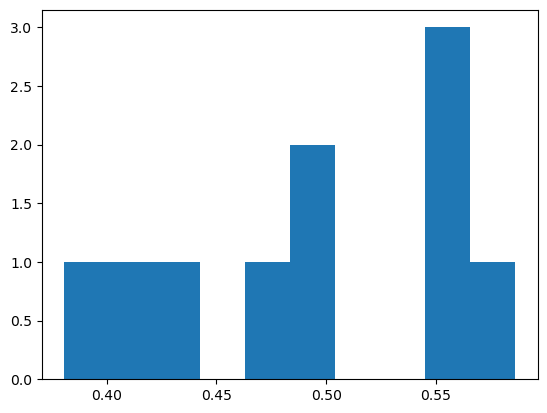

In [15]:
unis = []
# perform this action 10,000 times
for i in range(10):
    # create a dataset of ten uniformly-distributed items, all between 0 and 1 in value.
    rng = np.random.uniform(0,1,20)
    # calculate the mean of the range, and then add it the list
    unis.append(np.mean(rng))

plt.hist(unis)
plt.show()

At present this doesn't really tell us much. The values will mostly be between 0.4 and 0.6, which is where we would expect the mean to be, but the dataset is too small to prove the theorem. If we increase the size of the range that is looped through, we start to see a recognisable curve.

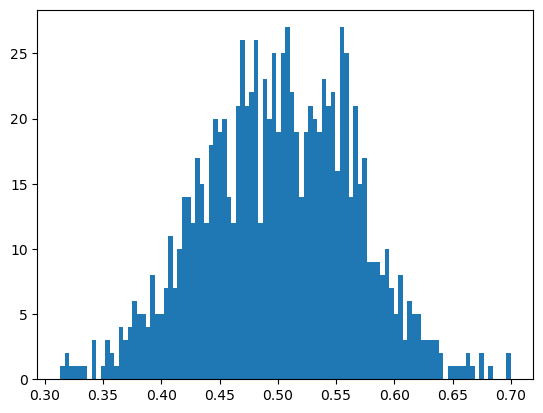

In [16]:
unis = []
for i in range(1000):
    rng = np.random.uniform(0,1,20)
    unis.append(np.mean(rng))

plt.hist(unis, bins=100)
plt.show()

By the time we get to 100,000, the curve is undeniable. Despite the source data being uniformly-distributed, we see a strong normal distribution curve when plotting the means of these uniform datasets, thus proving that:

... the mean of any set of variates with any distribution having a finite mean and variance tends to the normal distribution.

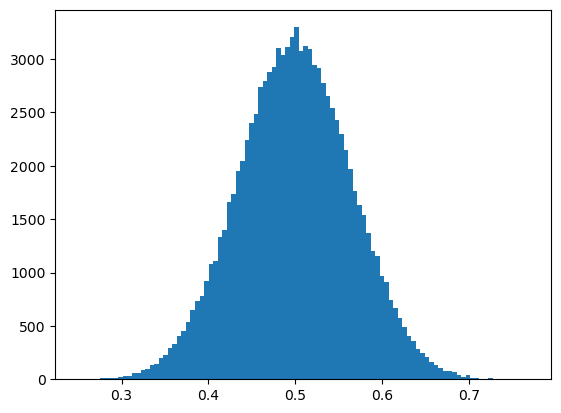

In [17]:
unis = []
for i in range(100000):
    rng = np.random.uniform(0,1,20)
    unis.append(np.mean(rng))

plt.hist(unis, bins=100)
plt.show()

Probability and Z-Scores
One of the defining features of the normal distribution is the ease with which the probability of a value occurring somewhere along the curve can be calculated using the plot. 

This is known as the z-score

The mean of this standardised population is 5.467271080306091e-16


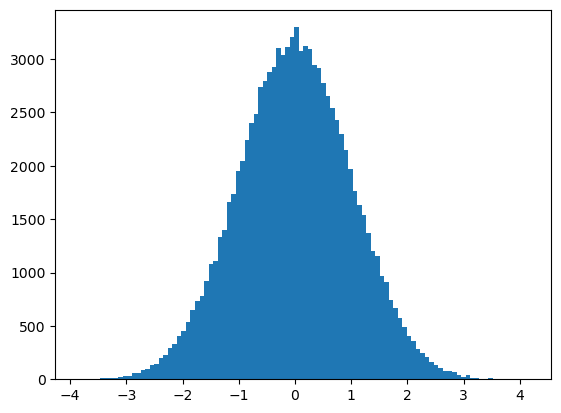

In [19]:
snd = []
# identify the mean of the range created above
mu = np.mean(unis)
# identify standard deviation of the same range
sigma = np.std(unis)

# loop through values and apply the standardising process to each value, then add the result to the new list
for z in unis:
    stdised = (z - mu) / sigma
    snd.append(stdised)

# print the mean to ensure it is very close to zero, e.g. -1.2714362895849263e-15 
print(f'The mean of this standardised population is {np.mean(snd)}')

# plot the results
plt.hist(snd, bins=100)
plt.show()

The result above is a dataset that been transferred from a mean of 0.5, to that with a mean of 0 and a standard deviation of 1. Indeed if you compare both plots, they will have exactly the same shape.

# z table 

The Z-Table represents the area under the curve to the left of a Z-Score. 

It represents the probability that z-values will fall within a region of the standard normal distribution.

The table is divided into negative and positive Z-Scores. Negative Z-Scores are below the mean, while positive Z-Scores are above the mean.



In [22]:
import scipy.stats as stats

# Define a function to look up the probability of a Z score in the Z table
def z_table_lookup(z_score):
    # Use the scipy.stats.norm.cdf() function to find the probability of a Z score. [20]
    probability = stats.norm.cdf(z_score)
    print(f"The probability of a Z score of {z_score:.2f} or less is {probability:.2f}")

# Look up the probability of a Z score of 1.96 or less
z_table_lookup(1.96)

# Look up the probability of a Z score of -1.96 or less
z_table_lookup(-1.96)

# Look up the probability of a Z score of 0 or less
z_table_lookup(0)

The probability of a Z score of 1.96 or less is 0.98
The probability of a Z score of -1.96 or less is 0.02
The probability of a Z score of 0.00 or less is 0.50


# Statistical Methods

Percentile Capping
means that data points less than the value at first percentile or greater than value at 99th percentile could be considered outliers.

In [23]:
mean = 0 
std = 1 
data = np.random.normal(mean, std, 1000)

# Add an outlier to the distribution
outlier = data.max() + 3 * std
data = np.append(data, outlier)

# Cap the values of the data at the 95th percentile
upper_threshold = np.percentile(data, 95)
data = np.clip(data, a_min=None, a_max=upper_threshold)

# Print the values of the data
print(data)

[-1.13761701  1.00407173  0.20808922 ... -0.37007732  0.20620761
  1.70749618]


The numpy clip function caps the values of the data at the 95th percentile, so any values above the 95th percentile will be set to the 95th percentile. This will effectively remove the outlier from the data, as it will be set to the same value as the 95th percentile. 

We can then use the data array to plot the distribution in a graphical format.

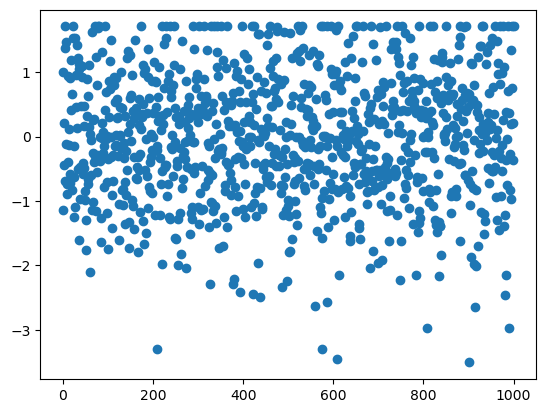

In [24]:
plt.scatter(range(len(data)), data)

plt.show()

# IQR (Inter Quantile Range)
If a value is higher than the 1.5IQR above the upper quartile (Q3), the value will be considered as outlier. Similarly, if a value is lower than the 1.5IQR below the lower quartile (Q1), the value will be considered as outlier.

In [25]:
# Generate a random normal distribution
mean = 0
std = 1
data = np.random.normal(mean, std, 1000)

# Add an outlier to the distribution
outlier = data.max() + 3 * std
data = np.append(data, outlier)

# Calculate the IQR of the data
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Identify any values outside of the IQR range as potential outliers
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
outliers = data[(data < lower_threshold) | (data > upper_threshold)]

# Print the values of the potential outliers
print(outliers)

[-3.42055242  2.78819922  2.85729657 -3.02389285  5.85729657]


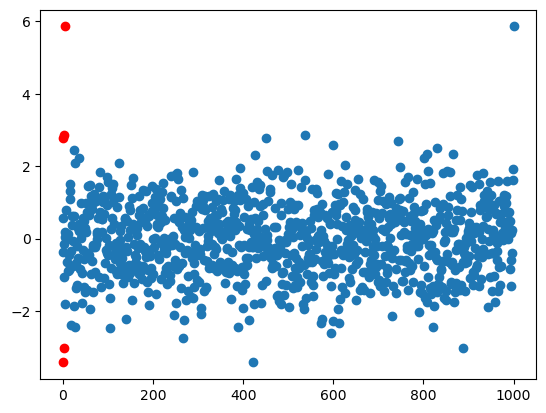

In [26]:
plt.scatter(range(len(data)), data)


plt.scatter(range(len(outliers)), outliers, color='red')


plt.show()

# Normality Tests
Normality tests are used to assess whether a given data set comes from a normal distribution. There have been many such tests devised for this purpose (>40). An informal approach to testing normality is to compare a histogram of the sample data to a normal probability curve, as I did above with my IQ data set. The histogram should be bell-shaped and resemble the normal distribution, although where a sample is small the curve may not be indicative enough.

Another commonly applied graphical method is a quantile-quantile plot (QQ plot) of the standardized data against the standard normal distribution where the correlation between the sample data and normal quantiles (a measure of the goodness of fit) measures how well the data are modeled by a normal distribution. If the points plotted in the QQ plot fall approximately on a straight line it indicates high positive correlation and normal data. The benefit of these plots is that they are visually easy to interpret, if a bit subjective, and outliers are easily identified.

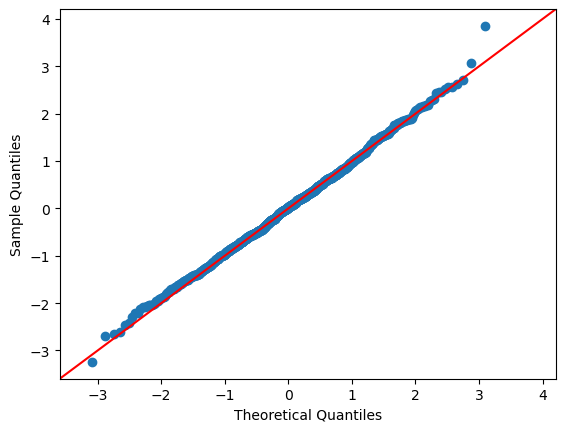

In [28]:
import statsmodels.api as sm
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='45')
plt.show()

# Conclusion
Throughout this notebook we have looked in detail at the Normal Distribution and explored its uses.

The Normal Distribution is a widely occurring distribution: Many real-world phenomena, such as human heights and intelligence test scores, are approximately normally distributed. This means that the normal distribution can be used to model and understand a wide range of data.

It is defined by only two parameters: The normal distribution is defined by its mean and standard deviation, which makes it relatively simple to work with compared to other distributions.

It is asymptotic: The normal distribution approaches but never touches the x-axis as it extends towards infinity in either direction. This property makes it a good choice for modeling data that is unbounded.

It is unimodal: The normal distribution is unimodal, meaning it has a single peak. This makes it a useful tool for understanding data that is centered around a single value.

It is used in many statistical tests: The normal distribution is used in various statistical tests such as the t-test and the F-test. It is also used in statistical modeling and machine learning algorithms, such as linear regression and the Naive Bayes classifier.

It is a good approximation for many real-world phenomena: The normal distribution is often used to understand the distribution of physical and biological phenomena, such as the heights of individuals or the lifespans of certain species.